## Importing necessary modules

In [90]:
import numpy as np
import pandas as pd

## Import data as a pandas dataframe and shuffling it

In [91]:
data = pd.read_csv("data.csv")
data = data.sample(frac=1)

## Preparing data
1. Data is split into inputs(X) and targets(y).
2. Data is converted into np arrays.
3. Inputs are normalised
4. Data is split into training set and testing set.

In [92]:
#Splitting data into inputs and targets
y = data[['Y1','Y2']]
X =  data[['X1','X2','X3','X4','X5','X6','X7','X8']]
y = np.array(y)
X = np.array(X)

#Normalising inputs
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#Split into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Regression function

In [93]:
#Function that returns test and train results in a list.
from sklearn.metrics import mean_squared_error

def regressor(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    testoutputs = model.predict(x_test)
    trainoutputs = model.predict(x_train)
    return [mean_squared_error(testoutputs,y_test),mean_squared_error(trainoutputs,y_train)]

## Neural Network Regression

In [94]:
from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(max_iter=5000)
result = regressor(MLP,X_train,y_train,X_test,y_test)
print("Neural Network testing value: ",result[0])
print("Neural Network training value: ",result[1])

Neural Network testing value:  4.45294414536094
Neural Network training value:  5.297207707760034


## Random Forest Regression

In [95]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
result = regressor(RFR,X_train,y_train,X_test,y_test)
print("Random Forest testing value: ",result[0])
print("Random Forest training value: ",result[1])

Random Forest testing value:  1.5028471708116973
Random Forest training value:  0.2719037104723124


## SVM Regression

In [96]:
from sklearn.svm import SVR

ytrain1,ytrain2=np.split(y_train,2,axis=1)
ytest1,ytest2=np.split(y_test,2,axis=1)

ytrain1 = ytrain1.flatten()
ytrain2 = ytrain2.flatten()
ytest1 = ytest1.flatten()
ytest2 = ytest2.flatten()


SVR1 = SVR()
result = regressor(SVR1,X_train,ytrain1,X_test,ytest1)
print("Support Vector Machine with Y1 testing value: ",result[0])
print("Support Vector Machine with Y2 training value: ",result[1],'\n')

SVR2 = SVR()
result = regressor(SVR2,X_train,ytrain2,X_test,ytest2)
print("Support Vector Machine with Y1 testing value: ",result[0])
print("Support Vector Machine with Y2 training value: ",result[1])

Support Vector Machine with Y1 testing value:  6.452178709179523
Support Vector Machine with Y2 training value:  7.640281930903057 

Support Vector Machine with Y1 testing value:  8.912513966014153
Support Vector Machine with Y2 training value:  9.90994477496386


## KFold Cross Validation

In [97]:
from sklearn.model_selection import KFold

kf5 = KFold(n_splits=5,random_state = 4, shuffle=True)

RFRvalues = []
MLPvalues = []
SVMY1values = []
SVMY2values = []


for train_index, test_index in kf5.split(X):
    
    X_train, X_test, y_train, y_test = X[train_index], X[test_index],y[train_index], y[test_index]

    MLPvalues.append(regressor(MLP,X_train,y_train,X_test,y_test))
    RFRvalues.append(regressor(RFR,X_train,y_train,X_test,y_test))
    
    ytrain1,ytrain2=np.split(y_train,2,axis=1)
    ytest1,ytest2=np.split(y_test,2,axis=1)

    SVMY1values.append(regressor(SVR1,X_train,ytrain1.flatten(),X_test,ytest1.flatten()))
    SVMY2values.append(regressor(SVR2,X_train,ytrain2.flatten(),X_test,ytest2.flatten()))
    

## Splitting training and testing results to visualise them seperately

In [98]:
from matplotlib import pyplot as plt

testRFR = []
testMLP = []
testSVMY1 = []
testSVMY2 = []

trainRFR = []
trainMLP = []
trainSVMY1 = []
trainSVMY2 = []

for i in range(len(RFRvalues)):
    testRFR.append(RFRvalues[i][0])
    testMLP.append(MLPvalues[i][0])
    testSVMY1.append(SVMY1values[i][0])
    testSVMY2.append(SVMY2values[i][0])
    
    trainRFR.append(RFRvalues[i][1])
    trainMLP.append(MLPvalues[i][1])
    trainSVMY1.append(SVMY1values[i][1])
    trainSVMY2.append(SVMY2values[i][1])

## Visualising Training Data

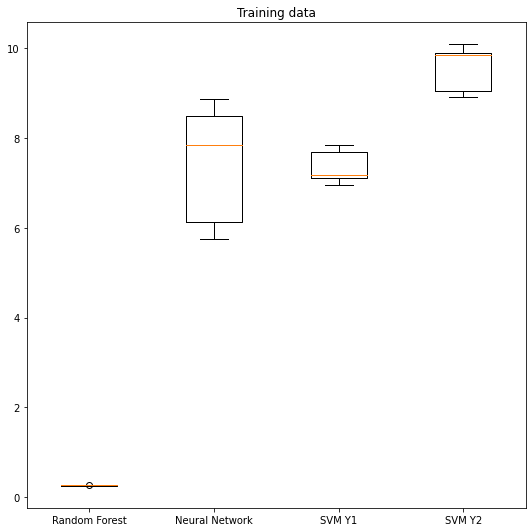

In [105]:
data = {'Random Forest': trainRFR, 'Neural Network': trainMLP, 'SVM Y1':trainSVMY1, 'SVM Y2':trainSVMY2}
fig, ax = plt.subplots()

plt.rcParams["figure.figsize"] = [7.50, 7.50]
plt.rcParams["figure.autolayout"] = True

ax.boxplot(data.values())
ax.set_xticklabels(data.keys())
plt.title("Training data")

plt.show()

## Visualising Testing Data

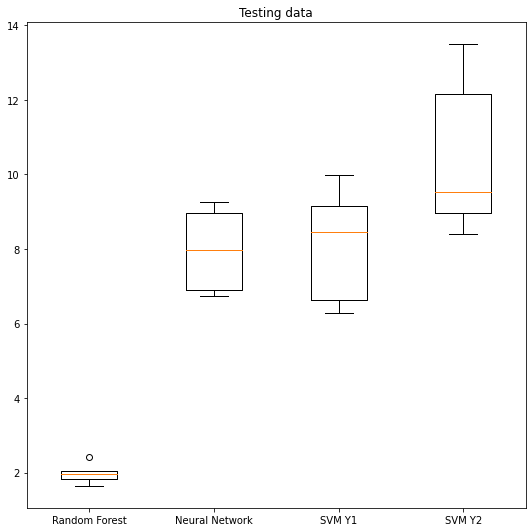

In [104]:
data = {'Random Forest': testRFR, 'Neural Network': testMLP, 'SVM Y1':testSVMY1, 'SVM Y2':testSVMY2}
fig, ax = plt.subplots()

plt.rcParams["figure.figsize"] = [7.50, 7.50]
plt.rcParams["figure.autolayout"] = True

ax.boxplot(data.values())
ax.set_xticklabels(data.keys())
plt.title("Testing data")

plt.show()